In [27]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
from astropy import constants as const
from astropy import units as u

In [2]:
print const.c

print const.c.cgs

print const.c.to('km/s')
print const.c.to('pc/yr')

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2010
29979245800.0 cm / s
299792.458 km / s
0.306601393788 pc / yr


In [3]:
F = (const.G.cgs * 3.*const.M_sun.cgs* 100* u.kg) / (2.2*u.au)**2
print F

print F.to(u.dyne)
print F.to(u.N)

8.22826558512e+27 cm3 kg / (AU2 s2)
36766.9392028 dyn
0.367669392028 N


In [4]:
a = 42.*u.cm

print a.value
print a.unit

x = 1.*u.pc
print x.to(u.km)

42.0
cm
3.08567758147e+13 km


In [5]:
""" create custom units """

cms = u.cm / u.s
mph = u.imperial.mile / u.hour

q = 42.*cms

print q
print q.to(mph)

42.0 cm / s
0.939513242663 mi / h


In [6]:
print 1100.1*u.m + 13.5*u.km
print 13.5*u.km + 1100.1*u.m

14600.1 m
14.6001 km


In [7]:
import numpy as np

print np.sin(30.*u.deg)

print np.sin(np.pi/6.)

0.5
0.5


In [8]:
""" dimensionless quantitites """
nu = 3.*u.GHz
T  = 30.*u.K

print np.exp(-const.h * nu / (const.k_B * T))

nu2 = 3.e9*u.Hz
print np.exp(-const.h * nu2 / (const.k_B * T))

0.995212254619
0.995212254619


In [9]:
a = 1. + 1.*u.m/u.km
print a

b = 1.+(1.*u.m/u.km).value
print b

c = (1.*u.m/u.km)
print c
print c.unit
print c.unit.decompose()

1.001
2.0
1.0 m / km
m / km
0.001


In [10]:
print u.dimensionless_unscaled == u.Unit('')

True


In [11]:
print u.g.find_equivalent_units()

  Primary name | Unit definition | Aliases                         
[
  M_e          | 9.10938e-31 kg  |                                  ,
  M_p          | 1.67262e-27 kg  |                                  ,
  earthMass    | 5.9742e+24 kg   | M_earth, Mearth                  ,
  g            | 0.001 kg        | gram                             ,
  jupiterMass  | 1.8987e+27 kg   | M_jup, Mjup, M_jupiter, Mjupiter ,
  kg           | irreducible     | kilogram                         ,
  solMass      | 1.9891e+30 kg   | M_sun, Msun                      ,
  t            | 1000 kg         | tonne                            ,
  u            | 1.66054e-27 kg  | Da, Dalton                       ,
]


## decomposing and composing units

In [12]:
print (u.km / u.m).decompose()
print (u.km / u.m).physical_type

1000
dimensionless


In [13]:
print u.Ry

print u.Ry.decompose(bases = u.cgs.bases)

Ry
2.17987e-11 cm2 g / s2


In [14]:
x = u.Ry.decompose()

print x.compose()

[Unit("Ry"), Unit("2.17987e-18 J"), Unit("2.17987e-11 erg"), Unit("13.6057 eV")]


In [15]:
""" compound units """
(u.s**-1).compose()

[Unit("Hz"), Unit("Bq"), Unit("3.7e+10 Ci")]

In [16]:
(u.s**-1).compose(equivalencies=u.spectral())

[Unit("Bq"),
 Unit("Hz"),
 Unit("6.62607e-34 J"),
 Unit("6.62607e-27 erg"),
 Unit("3.03966e-16 Ry"),
 Unit("4.13567e-15 eV"),
 Unit("3.33564e-11 k"),
 Unit("9.71561e-09 pc"),
 Unit("3.16881e-08 lyr"),
 Unit("0.00200399 AU"),
 Unit("0.431041 solRad"),
 Unit("2.99792e+08 m"),
 Unit("2.99792e+10 cm"),
 Unit("3.7e+10 Ci"),
 Unit("2.99792e+14 micron"),
 Unit("2.99792e+18 Angstrom"),
 Unit("2.99792e+06 k m2"),
 Unit("3.33564e-09 / m"),
 Unit("3.50331e-42 pc2 / m3"),
 Unit("3.72675e-41 lyr2 / m3"),
 Unit("1.49049e-31 AU2 / m3"),
 Unit("6.89565e-27 solRad2 / m3"),
 Unit("3.33564e-05 cm2 / m3"),
 Unit("3335.64 micron2 / m3"),
 Unit("3.33564e+11 Angstrom2 / m3")]

In [17]:
""" Temperature Energy Equivalency """

t_k = 1.e6*u.K

print t_k.to(u.eV, equivalencies = u.temperature_energy())

86.1733238496 eV


In [18]:
u.Hz.find_equivalent_units()

  Primary name | Unit definition | Aliases     
[
  Bq           | 1 / s           | becquerel    ,
  Ci           | 2.7027e-11 / s  | curie        ,
  Hz           | 1 / s           | Hertz, hertz ,
]

In [19]:
u.Hz.find_equivalent_units(equivalencies=u.spectral())

  Primary name | Unit definition        | Aliases              
[
  AU           | 1.49598e+11 m          | au, astronomical_unit ,
  Angstrom     | 1e-10 m                | AA, angstrom          ,
  Bq           | 1 / s                  | becquerel             ,
  Ci           | 2.7027e-11 / s         | curie                 ,
  Hz           | 1 / s                  | Hertz, hertz          ,
  J            | kg m2 / s2             | Joule, joule          ,
  Ry           | 2.17987e-18 kg m2 / s2 | rydberg               ,
  cm           | 0.01 m                 | centimeter            ,
  eV           | 1.60218e-19 kg m2 / s2 | electronvolt          ,
  erg          | 1e-07 kg m2 / s2       |                       ,
  k            | 100 / m                | Kayser, kayser        ,
  lyr          | 9.46073e+15 m          | lightyear             ,
  m            | irreducible            | meter                 ,
  micron       | 1e-06 m                |                       ,
  pc      

In [20]:
print u.m.is_equivalent(u.pc)
print (u.m**3).is_equivalent(u.l)

True
True


## Models and Fitting

Model: Gaussian1D
Inputs: (u'x',)
Outputs: (u'y',)
Model set size: 1
Parameters:
    amplitude mean stddev
    --------- ---- ------
          1.2  0.9    0.5
Parameter('amplitude', value=1.2)
Parameter('mean', value=0.9)
Parameter('stddev', value=0.5)
0.333644760544
[ 0.87137884  1.07619607  1.1893806   1.17623841  1.04091417  0.82428907
  0.58410271]


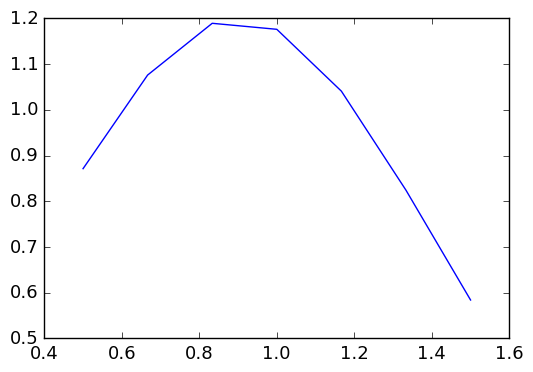

In [28]:
from astropy.modeling import models
import numpy as np
import matplotlib.pyplot as plt

g = models.Gaussian1D(amplitude=1.2, mean=0.9, stddev=0.5)

print (g)

print g.amplitude
print g.mean
print g.stddev

print g(0.1)

x = np.linspace(0.5,1.5,7)
y = g(x)
print y

plt.plot(x,y)
plt.show()

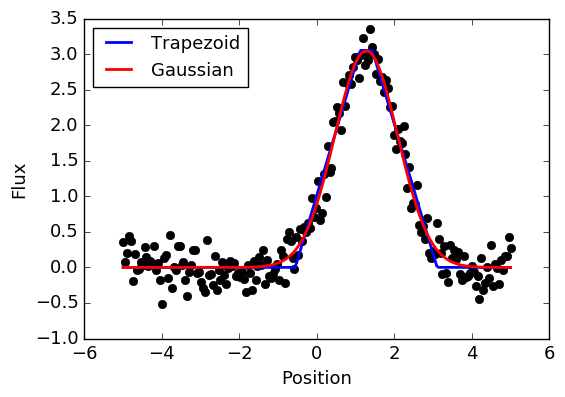

In [32]:
import numpy as np
from astropy.modeling import models, fitting
import matplotlib.pyplot as plt

# Generate face data
np.random.seed(0)
x = np.linspace(-5.,5.,200)
y = 3*np.exp(-0.5*(x-1.3)**2 / 0.8**2)
y += np.random.normal(0., 0.2, x.shape)

# Fit the data using a box model
t_init = models.Trapezoid1D(amplitude=1., x_0=0., width=1., slope=0.5)
fit_t = fitting.LevMarLSQFitter()
t = fit_t(t_init, x, y)

# Fit the data using a Gaussian
g_init = models.Gaussian1D(amplitude=1., mean=0., stddev=1.)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, x, y)

# Plot the data with the best-fit model
# plt.figure(figsize=(8,5))
plt.plot(x, y, 'ko')
plt.plot(x, t(x), 'b-', lw=2, label='Trapezoid')
plt.plot(x, g(x), 'r-', lw=2, label='Gaussian')
plt.xlabel('Position')
plt.ylabel('Flux')
plt.legend(loc=2, fontsize='medium')
plt.show()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6.83285936044
            Iterations: 14
            Function evaluations: 137
            Gradient evaluations: 14


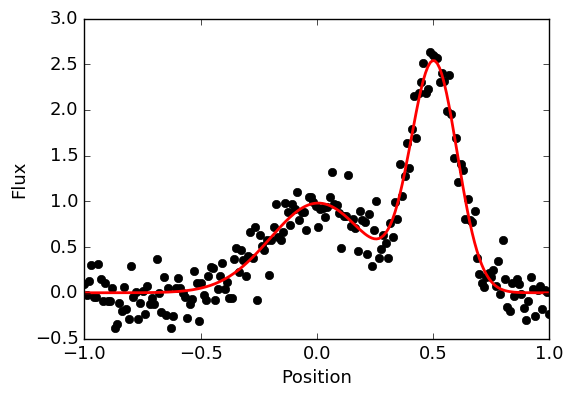

In [33]:
import numpy as np
from astropy.modeling import models, fitting
import matplotlib.pyplot as plt

# Generate fake data
np.random.seed(42)
g1 = models.Gaussian1D(1, 0, 0.2)
g2 = models.Gaussian1D(2.5, 0.5, 0.1)
x = np.linspace(-1, 1, 200)
y = g1(x) + g2(x) + np.random.normal(0., 0.2, x.shape)

# Now to fit the data create a new superposition with initial
# guesses for the parameters:
gg_init = models.Gaussian1D(1, 0, 0.1) + models.Gaussian1D(2, 0.5, 0.1)
fitter = fitting.SLSQPLSQFitter()
gg_fit = fitter(gg_init, x, y)

# Plot the data with the best-fit model
#plt.figure(figsize=(8,5))
plt.plot(x, y, 'ko')
plt.plot(x, gg_fit(x), 'r-', lw=2)
plt.xlabel('Position')
plt.ylabel('Flux')
plt.show()